In [1]:
import pandas as pd
import sklearn
from sklearn import svm, preprocessing

In [2]:
db = pd.read_csv("E:\programs\python programs\ml basics\youtube_playlist1\minorP\link_data_final.csv", index_col=0)
db.head()

,label,result,IPpresent,url_len,dotC,dslashC,sslashC,hyphenC,delimC,shady_tld
url,,,,,,,,,,
https://www.google.com,benign,0,0,22,2,1,0,0,0,0
https://www.youtube.com,benign,0,0,23,2,1,0,0,0,0
https://www.facebook.com,benign,0,0,24,2,1,0,0,0,0
https://www.baidu.com,benign,0,0,21,2,1,0,0,0,0
https://www.wikipedia.org,benign,0,0,25,2,1,0,0,0,0


In [21]:
db = sklearn.utils.shuffle(db)
db.head()

,label,result,IPpresent,url_len,dotC,dslashC,sslashC,hyphenC,delimC,shady_tld
url,,,,,,,,,,
https://www.polymtl.ca/grames/en/people/professor_wu_t_en.htm,benign,0,0,61,3,1,4,0,3,0
https://www.pipl.com/directory/name/Lauzon/Robert,benign,0,0,49,2,1,4,0,0,0
mainlandfishfarm.com/ms21hvyw,malicious,1,0,29,1,0,1,0,0,0
https://www.foodandwine.com/recipes/perfect-pizza-margherita,benign,0,0,60,2,1,2,2,0,0
https://www.sourceforge.net/mailarchive/forum.php?thread_name=E1MWsiD-0001j5-5J%4074yxhf1.ch3.sourceforge.com&forum_name=dbpedia-svn,benign,0,0,132,6,1,2,3,6,0


In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import cross_validate

In [22]:
X = np.array(db.drop(['label','result'],1))
y = np.array(db['result'])

X_train, X_test, y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
X

array([[ 0, 61,  3, ...,  0,  3,  0],
       [ 0, 49,  2, ...,  0,  0,  0],
       [ 0, 29,  1, ...,  0,  0,  0],
       ...,
       [ 0, 46,  3, ...,  0,  3,  0],
       [ 0, 46,  3, ...,  0,  0,  0],
       [ 0, 53,  3, ...,  0,  0,  0]], dtype=int64)

In [23]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

# Visualisation of data

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [5]:
import seaborn as sns
sns.set()

In [6]:
db_label_gp = db.groupby('label')
db_ben_gp = db_label_gp.get_group('benign')
db_mal_gp = db_label_gp.get_group('malicious')

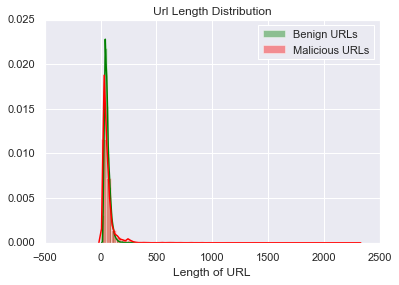

In [7]:
sns.distplot(db_ben_gp['url_len'],color='green',label='Benign URLs')
sns.distplot(db_mal_gp['url_len'],color='red',label='Malicious URLs')
plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Length of URL')
plt.show()

# K-Nearest Neighbors Model

### Model prediction for only lexical features of URL

In [8]:
from sklearn import neighbors

In [9]:
clf= neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  87.61933741584572


In [28]:
#IPpresent, url_len, dotC, dslashC, sslashC, hyphenC, delimC, unsafeTLD
#malicious url
#url1 = https://ee-update.ref17.com/?ee=2 , url2 = https://apple-idsecurefix.com/ , url5 = http://188.165.3.247:6667
#url6 = http://bboytaher1.no-ip.biz:1177, url7 = http://maypole.co.kr/mm/sun.exe, url10= http://1e90ff.com/q
#benign url
#url3 = https://learn.freecodecamp.org/ , url4 = https://www.mygov.in/, url8 = https://www.igdtuw.ac.in , url9 = https://www.coursera.org/learn/machine-learning


ex_measure = np.array([[0,33,2,1,1,1,2,0], [0,30,1,1,1,1,0,0], [0,30,2,1,1,0,0,0],[0,21,2,1,1,0,0,0],[1,25,3,1,0,0,0,0],[0,32,2,0,1,0,0,0],[0,31,3,1,2,0,0,1],[0,24,2,1,0,0,0,0],[0,47,2,1,2,1,0,0],[0,19,1,1,1,0,0,0]])
ex_measure = ex_measure.reshape(len(ex_measure),-1)

prediction = clf.predict(ex_measure)
print('Model Prediction = ', prediction)

Model Prediction =  [0 1 0 0 1 1 1 0 0 1]


Model prediction correct for 9/10 cases. Correct prediction (1 1 0 0 1 1 1 0 0 1)

# Logistic Regression Classifier Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf= LogisticRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy =  82.39606709520369


In [25]:
#IPpresent, url_len, dotC, dslashC, sslashC, hyphenC, delimC, unsafeTLD
#malicious url
#url1 = https://ee-update.ref17.com/?ee=2 , url2 = https://apple-idsecurefix.com/ , url5 = http://188.165.3.247:6667
#url6 = http://bboytaher1.no-ip.biz:1177, url7 = http://maypole.co.kr/mm/sun.exe, url10= http://1e90ff.com/q
#benign url
#url3 = https://learn.freecodecamp.org/ , url4 = https://www.mygov.in/, url8 = https://www.igdtuw.ac.in , url9 = https://www.coursera.org/learn/machine-learning


ex_measure = np.array([[0,33,2,1,1,1,2,0], [0,30,1,1,1,1,0,0], [0,30,2,1,1,0,0,0],[0,21,2,1,1,0,0,0],[1,25,3,1,0,0,0,0],[0,32,2,0,1,0,0,0],[0,31,3,1,2,0,0,1],[0,24,2,1,0,0,0,0],[0,47,2,1,2,1,0,0],[0,19,1,1,1,0,0,0]])
ex_measure = ex_measure.reshape(len(ex_measure),-1)

prediction = clf.predict(ex_measure)
print('Model Prediction = ', prediction)

Model Prediction =  [0 0 0 0 1 1 1 0 0 0]


Model prediction correct for 7/10 cases. Correct prediction (1 1 0 0 1 1 1 0 0 1)

# Random Forest Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf= DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print('Model accuracy = ', accuracy*100)

Model accuracy =  86.12452930660682


In [32]:
#IPpresent, url_len, dotC, dslashC, sslashC, hyphenC, delimC, unsafeTLD
#malicious url
#url1 = https://ee-update.ref17.com/?ee=2 , url2 = https://apple-idsecurefix.com/ , url5 = http://188.165.3.247:6667
#url6 = http://bboytaher1.no-ip.biz:1177, url7 = http://maypole.co.kr/mm/sun.exe, url10= http://1e90ff.com/q
#benign url
#url3 = https://learn.freecodecamp.org/ , url4 = https://www.mygov.in/, url8 = https://www.igdtuw.ac.in , url9 = https://www.coursera.org/learn/machine-learning


ex_measure = np.array([[0,33,2,1,1,1,2,0], [0,30,1,1,1,1,0,0], [0,30,2,1,1,0,0,0],[0,21,2,1,1,0,0,0],[1,25,3,1,0,0,0,0],[0,32,2,0,1,0,0,0],[0,31,3,1,2,0,0,1],[0,24,2,1,0,0,0,0],[0,47,2,1,2,1,0,0],[0,19,1,1,1,0,0,0]])
ex_measure = ex_measure.reshape(len(ex_measure),-1)

prediction = clf.predict(ex_measure)
print('Model Prediction = ', prediction)

Model Prediction =  [0 1 0 0 0 1 0 0 0 1]


Model prediction correct for 7/10 cases. Correct prediction (1 1 0 0 1 1 1 0 0 1)